In [1]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
emp_att_df = pd.read_csv("Synthetic-IBM-HR-Employee-Attrition.csv")
emp_att_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,26,No,Travel_Rarely,265,Sales,3,2,Other,1,1801,...,1,80,1,11,2,3,11,17,4,2
1,31,No,Non-Travel,157,Research & Development,2,3,Medical,1,500,...,3,80,0,12,4,3,13,0,0,8
2,48,No,Travel_Rarely,836,Research & Development,9,1,Life Sciences,1,1139,...,1,80,1,33,2,3,2,5,2,2
3,18,Yes,Non-Travel,664,Research & Development,17,3,Medical,1,1349,...,4,80,0,0,6,2,9,7,1,7
4,59,No,Travel_Rarely,230,Sales,7,3,Marketing,1,1351,...,2,80,0,3,2,2,4,0,0,4


In [3]:
emp_att_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
emp_att_df.shape

(150000, 35)

In [5]:
emp_att_str_df = emp_att_df.select_dtypes('object')
emp_att_int_df = emp_att_df.select_dtypes('int64');

In [6]:
emp_att_str_df.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,150000,150000,150000,150000,150000,150000,150000,150000,150000
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,123122,103019,95485,59246,89856,34359,65866,150000,104654


In [7]:
emp_att_int_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,150000.0,37.987367,12.499119,18.0,28.0,37.0,48.0,59.0
DailyRate,150000.0,804.288227,405.745060,107.0,461.0,803.0,1168.0,1494.0
DistanceFromHome,150000.0,9.348047,8.099640,1.0,2.0,7.0,15.0,29.0
Education,150000.0,2.902493,1.039977,1.0,2.0,3.0,4.0,5.0
EmployeeCount,150000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,150000.0,1021.633527,599.607859,8.0,487.0,1014.0,1552.0,2059.0
EnvironmentSatisfaction,150000.0,2.708667,1.085234,1.0,2.0,3.0,4.0,4.0
HourlyRate,150000.0,66.230233,20.350022,30.0,48.0,66.0,84.0,100.0
JobInvolvement,150000.0,2.718140,0.734288,1.0,2.0,3.0,3.0,4.0
JobLevel,150000.0,2.075067,1.124248,1.0,1.0,2.0,3.0,5.0


In [8]:
emp_att_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,150000.0,37.987367,12.499119,18.0,28.0,37.0,48.0,59.0
DailyRate,150000.0,804.288227,405.745060,107.0,461.0,803.0,1168.0,1494.0
DistanceFromHome,150000.0,9.348047,8.099640,1.0,2.0,7.0,15.0,29.0
Education,150000.0,2.902493,1.039977,1.0,2.0,3.0,4.0,5.0
EmployeeCount,150000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,150000.0,1021.633527,599.607859,8.0,487.0,1014.0,1552.0,2059.0
EnvironmentSatisfaction,150000.0,2.708667,1.085234,1.0,2.0,3.0,4.0,4.0
HourlyRate,150000.0,66.230233,20.350022,30.0,48.0,66.0,84.0,100.0
JobInvolvement,150000.0,2.718140,0.734288,1.0,2.0,3.0,3.0,4.0
JobLevel,150000.0,2.075067,1.124248,1.0,1.0,2.0,3.0,5.0


In [9]:
len(emp_att_df.index)


150000

In [10]:
emp_att_df.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [11]:
emp_att_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
have_duplicated_row = emp_att_df.duplicated().any()
have_duplicated_row

False

In [13]:
null_mask = emp_att_df.isnull().any(axis=1)
null_rows = emp_att_df[null_mask]

print(null_rows)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [14]:
emp_att_df.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [15]:
emp_att_df = emp_att_df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

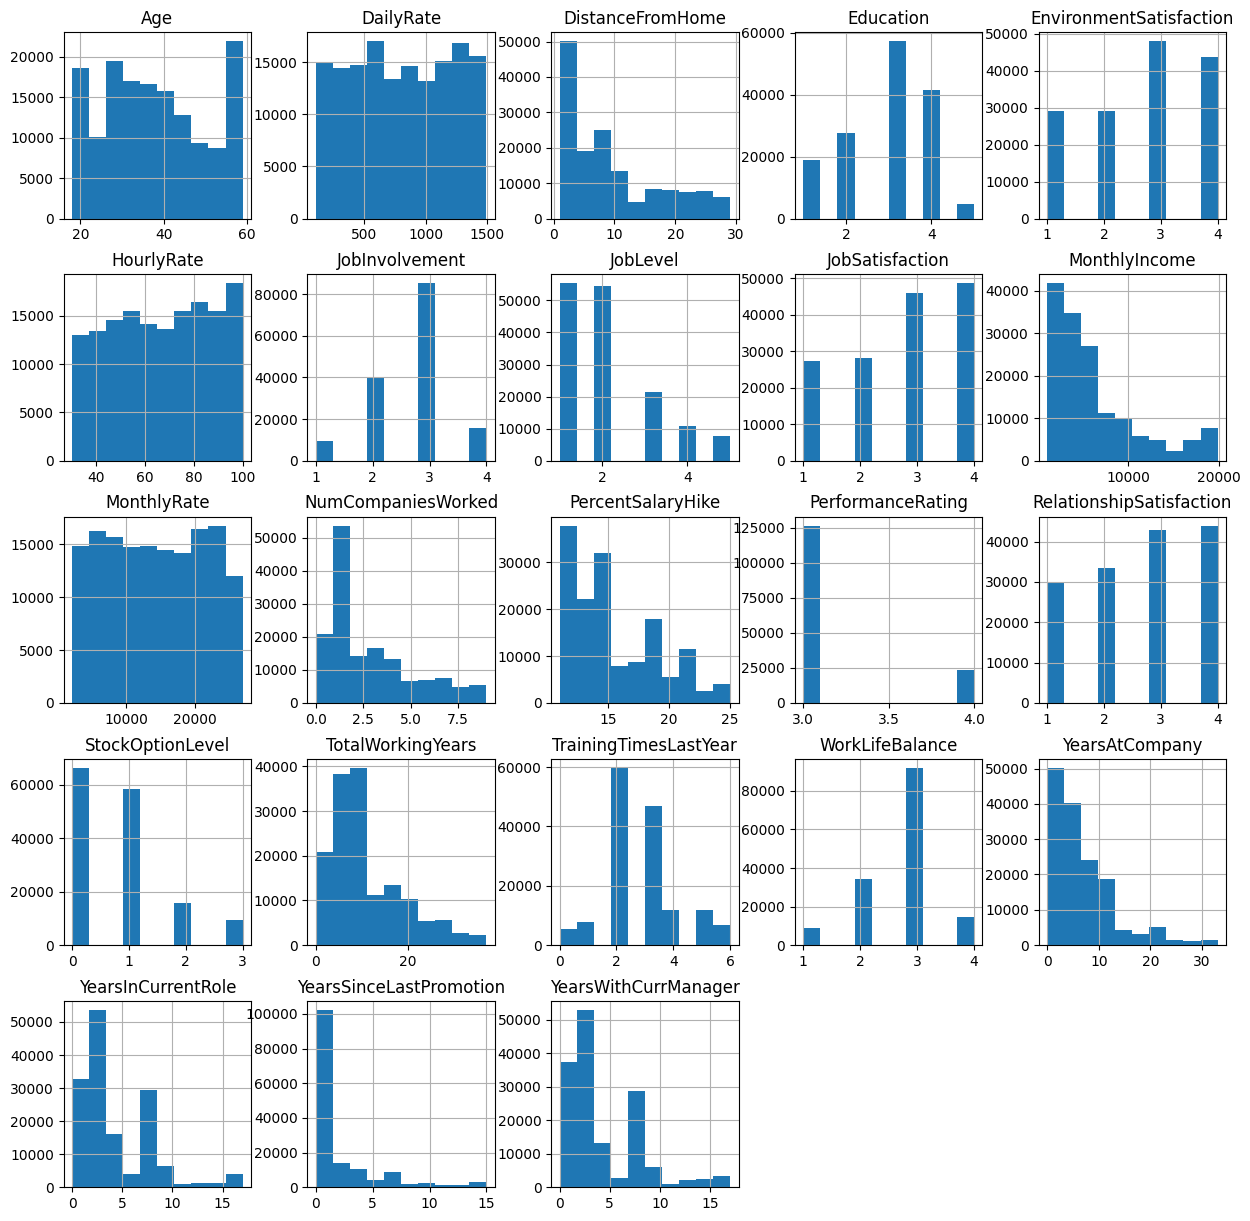

In [16]:
emp_att_df.hist(figsize=(15,15))
plt.show()


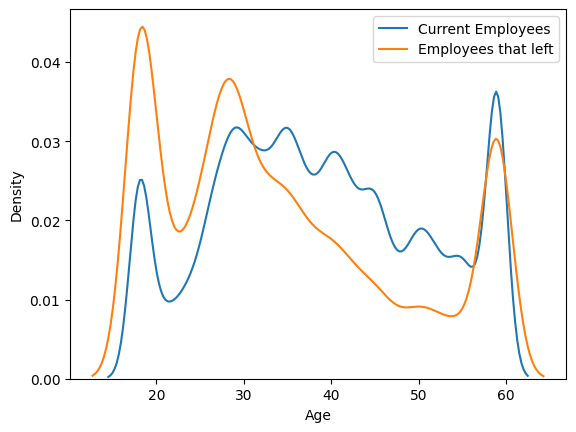

In [17]:
sns.kdeplot(
    emp_att_df.loc[emp_att_df['Attrition'] == 'No', 'Age'],
    label='Current Employees'
)
sns.kdeplot(
    emp_att_df.loc[emp_att_df['Attrition'] == 'Yes', 'Age'],
    label='Employees that left'
)

plt.legend()
plt.show()

In [18]:
categorical_columns = emp_att_df.select_dtypes(['object']).columns
numerical_columns = emp_att_df.select_dtypes(['number']).columns

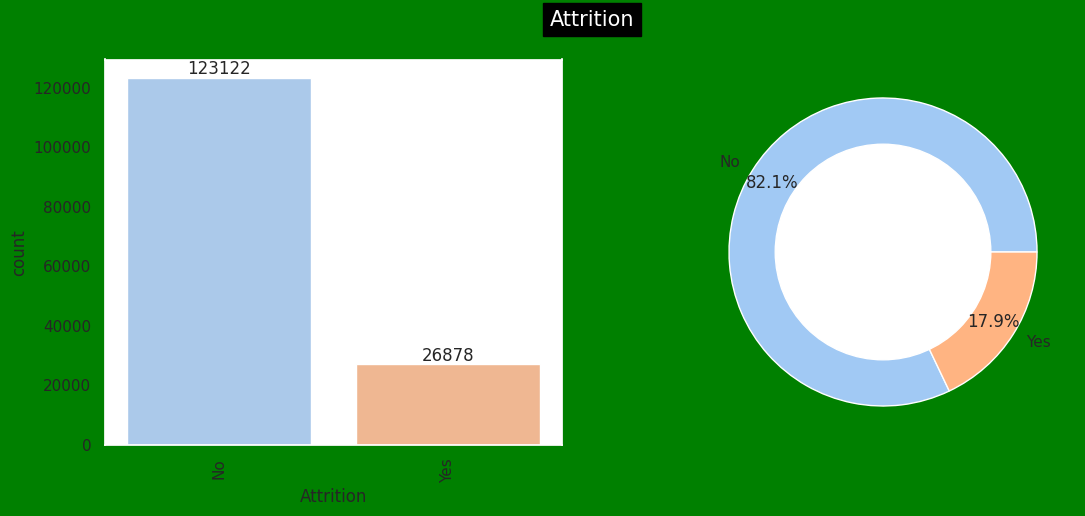

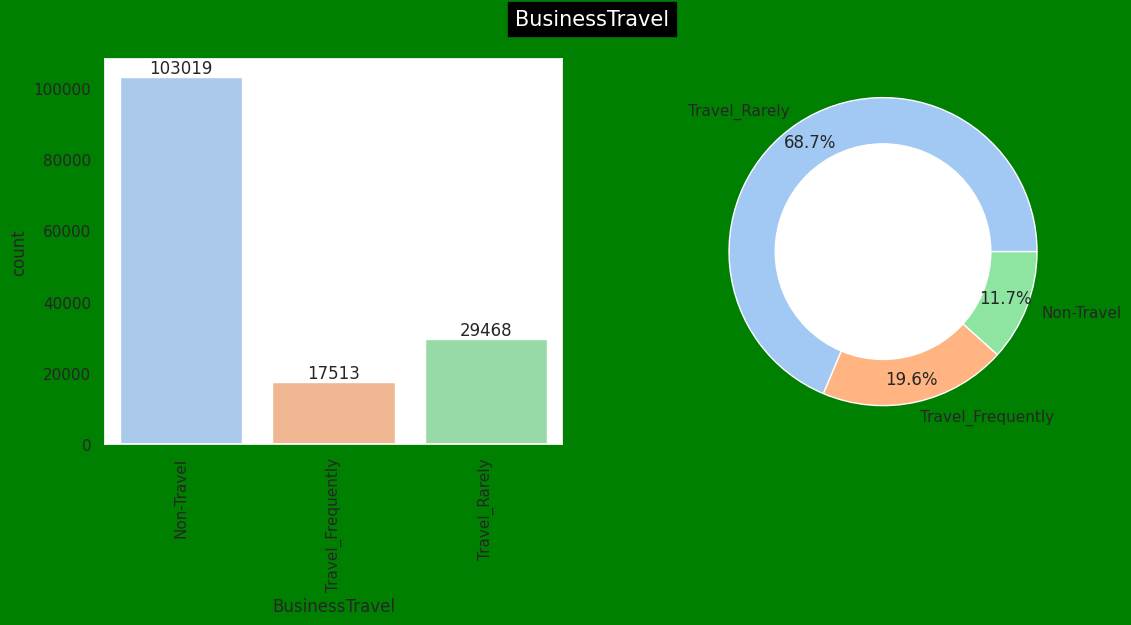

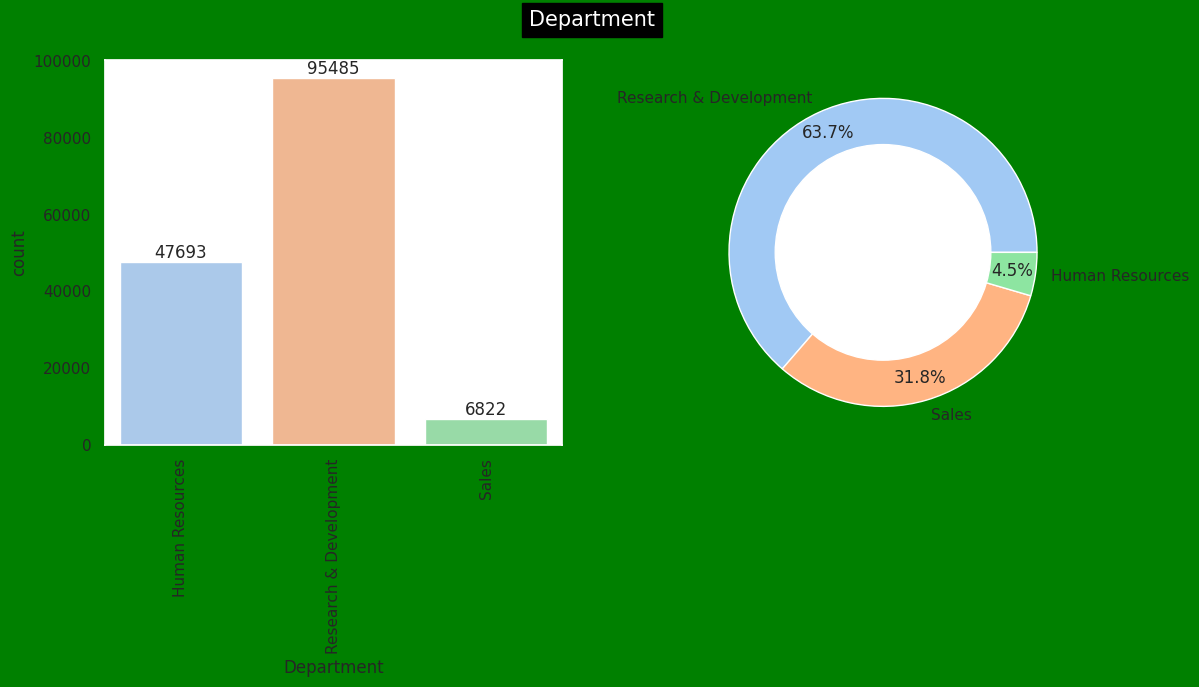

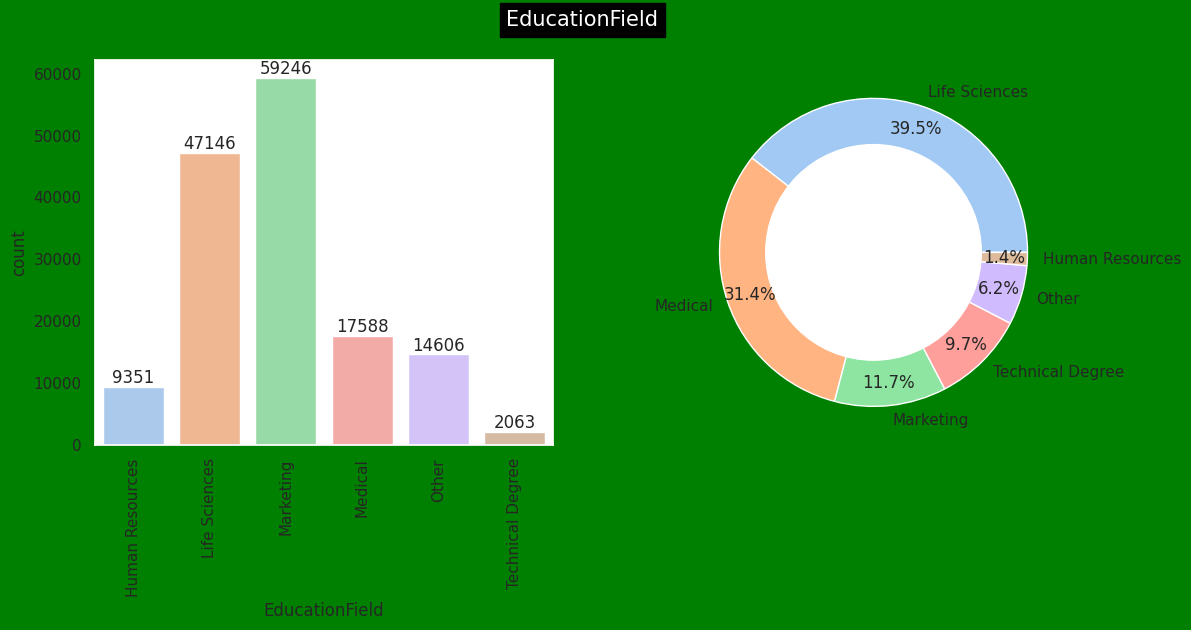

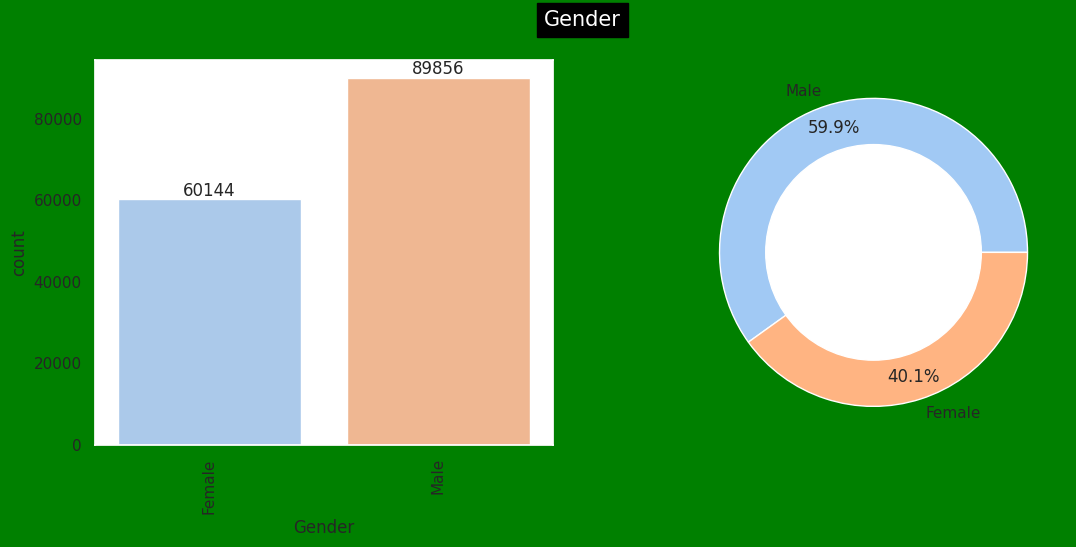

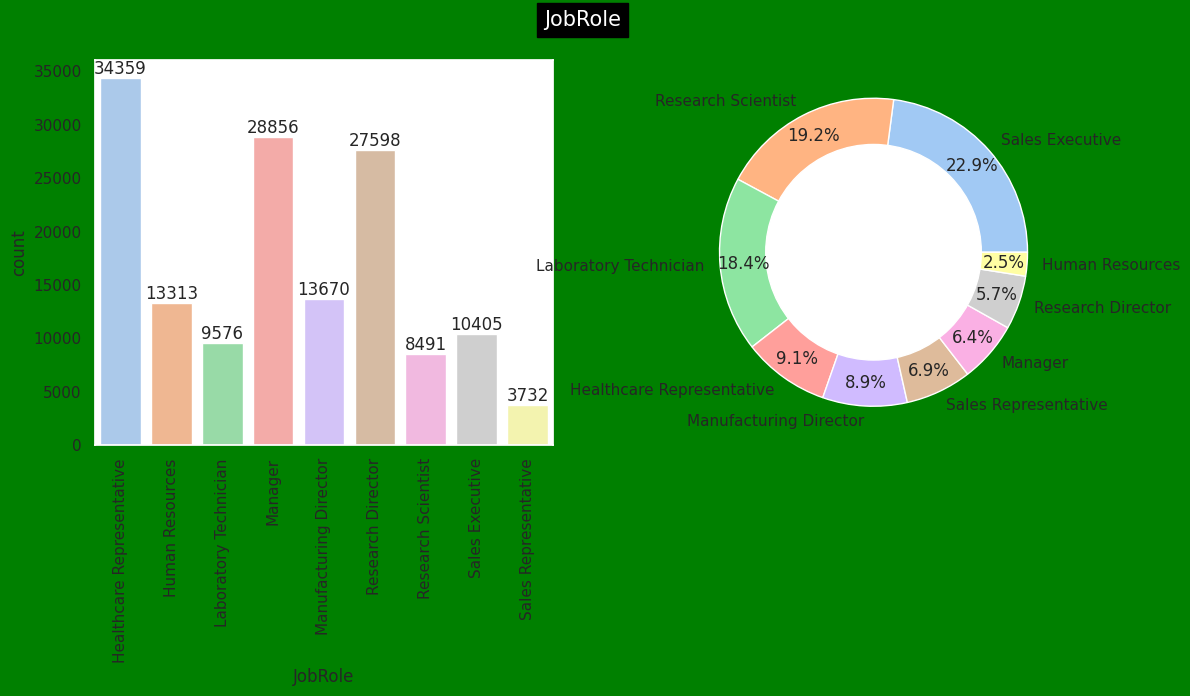

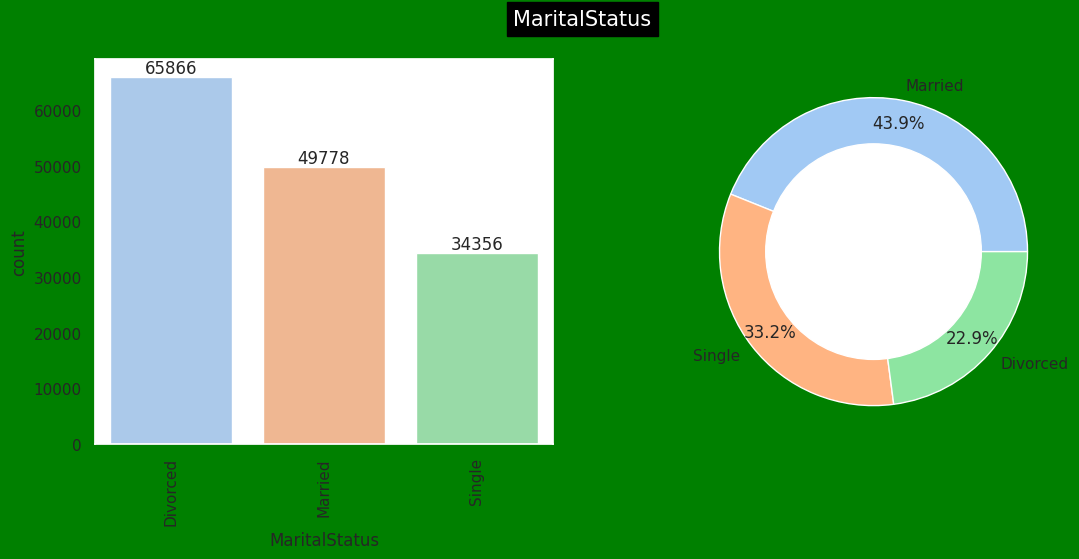

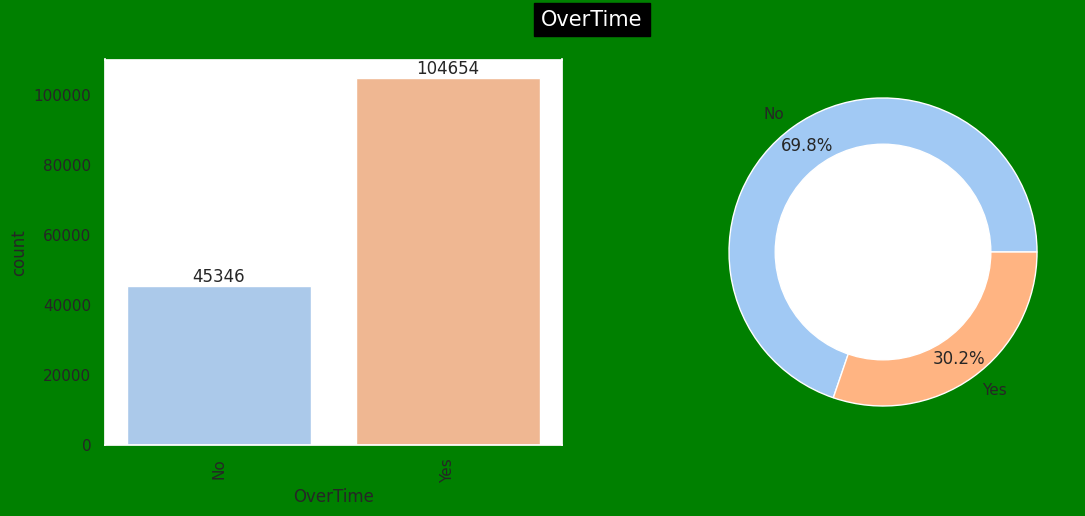

In [19]:
sns.set(rc={'axes.facecolor': 'White', 'figure.facecolor': 'green'})
sns.set_palette('pastel')

for i, col in enumerate(categorical_columns):
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))

    ax = sns.countplot(data=emp_att_df, x=col, ax=axes[0])

    activities = [var for var in emp_att_df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities, rotation=90)

    for container in axes[0].containers:
        axes[0].bar_label(container)

    index =  emp_att_df[col].value_counts().index
    size = emp_att_df[col].value_counts().values

    axes[1].pie(
        size,
        labels=index,
        autopct='%1.1f%%',
        pctdistance=0.85,
        colors=sns.color_palette('pastel'),
    )

    centre_circle = plt.Circle((0, 0), 0.70, fc='White')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.suptitle(col, backgroundcolor='Black', color='white', fontsize=15)

    plt.show()

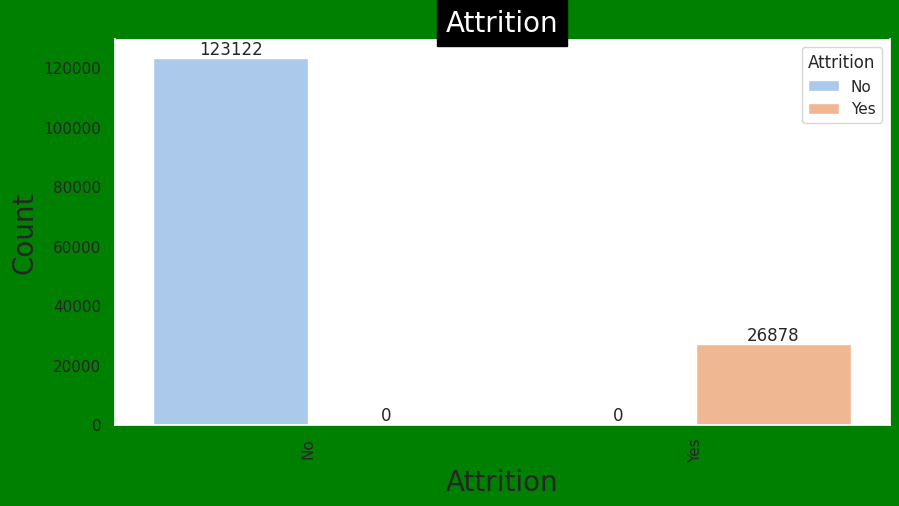

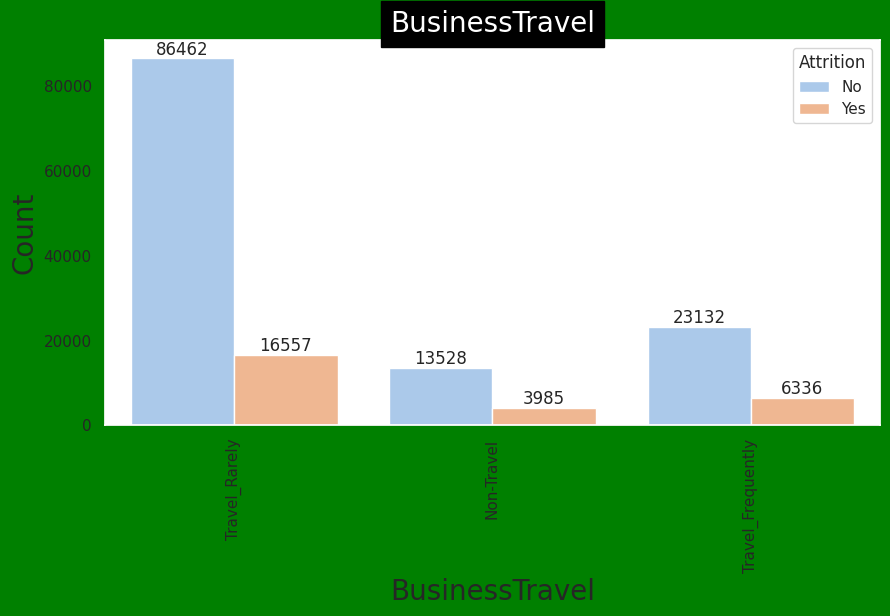

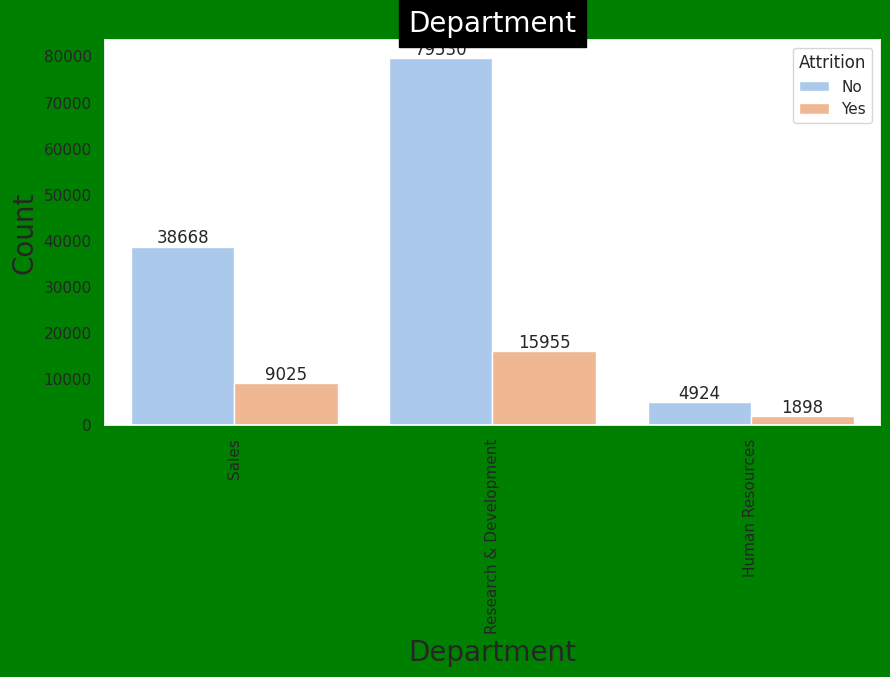

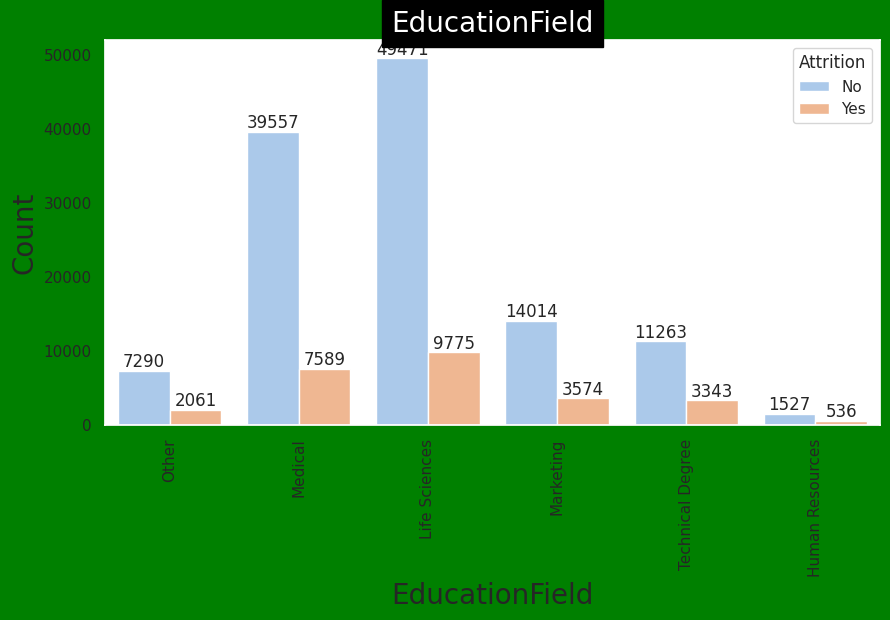

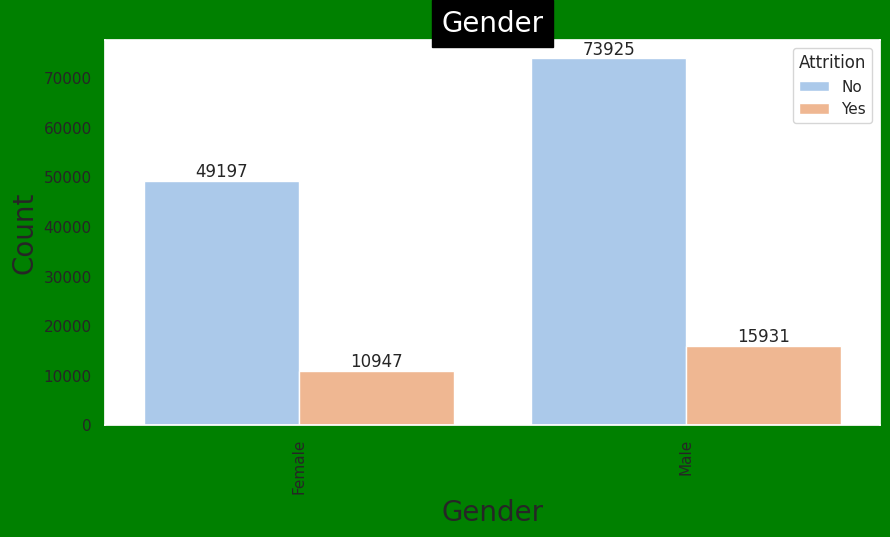

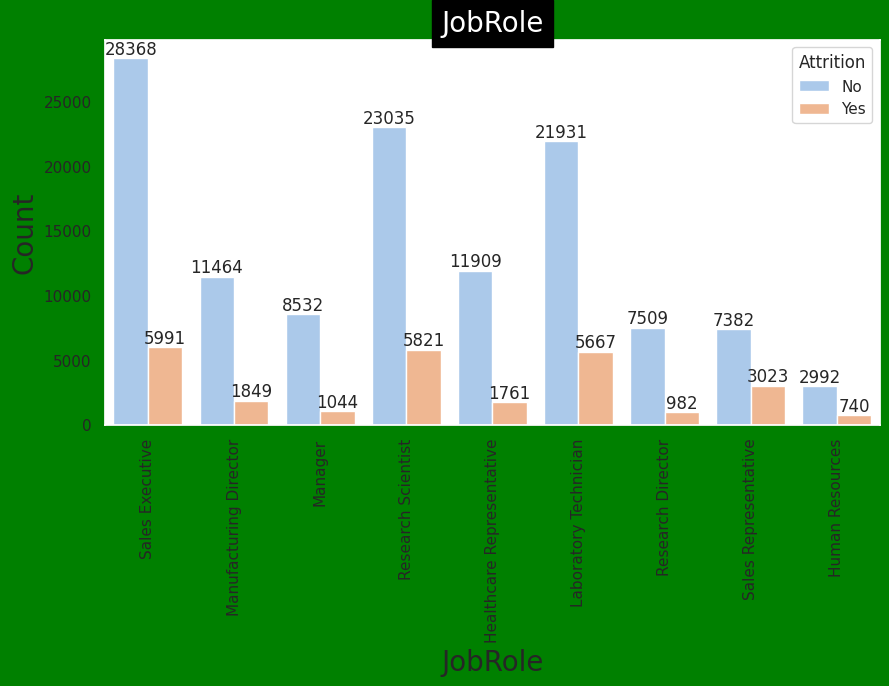

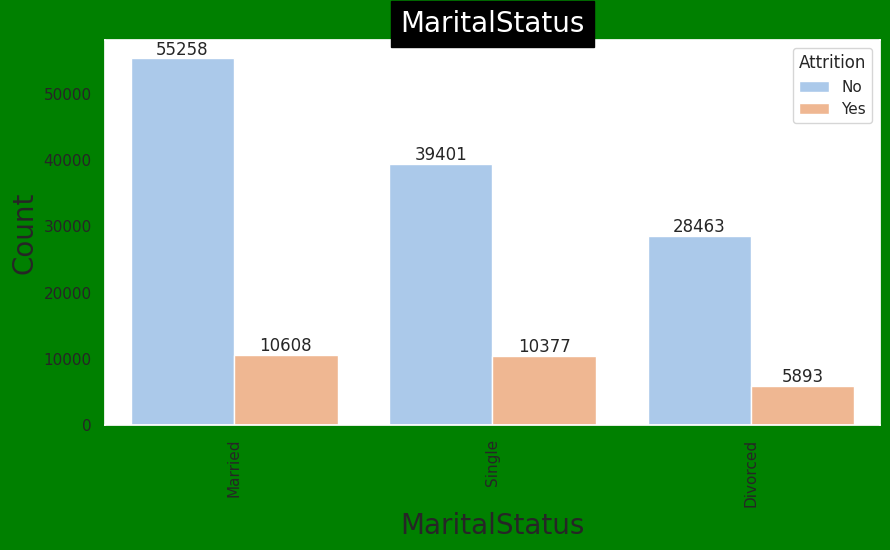

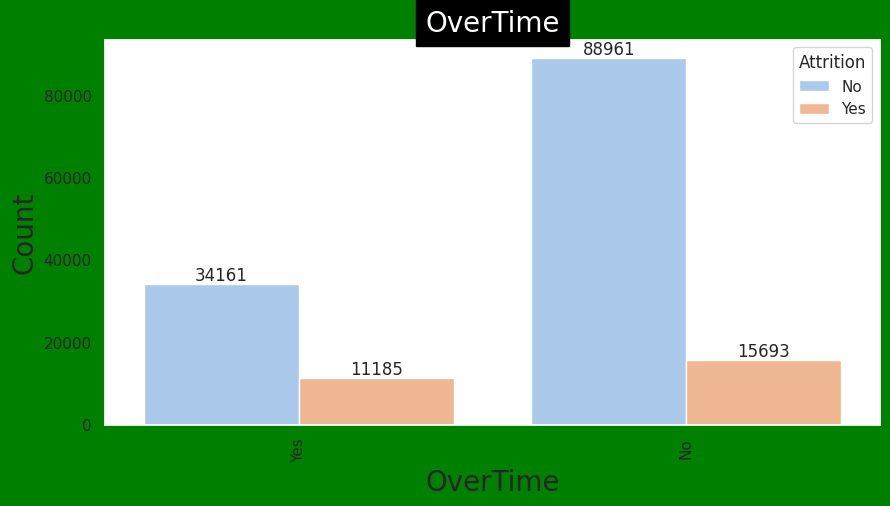

In [20]:
for col in categorical_columns:
    fig = plt.figure(figsize=(10, 5))

    ax = sns.countplot(x=emp_att_df[col], data=emp_att_df, hue='Attrition')

    for container in ax.containers:
        ax.bar_label(container)

    plt.title(col, backgroundcolor='black', color='white', fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.grid(True)

    plt.show()

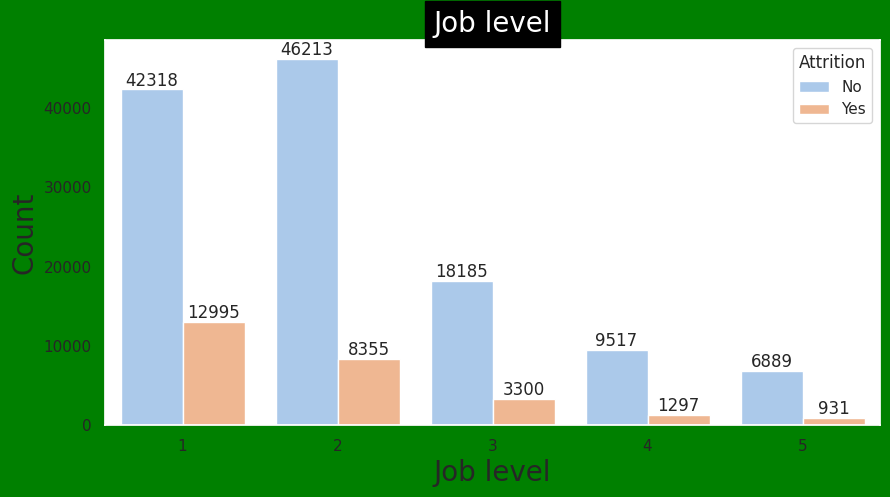

In [21]:
fig = plt.figure(figsize=(10, 5))

ax = sns.countplot(x="JobLevel", data=emp_att_df, hue="Attrition")

for container in ax.containers:
    ax.bar_label(container)

plt.title("Job level", backgroundcolor='black', color='white', fontsize=20)
plt.xlabel("Job level", fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid(True)

plt.show()

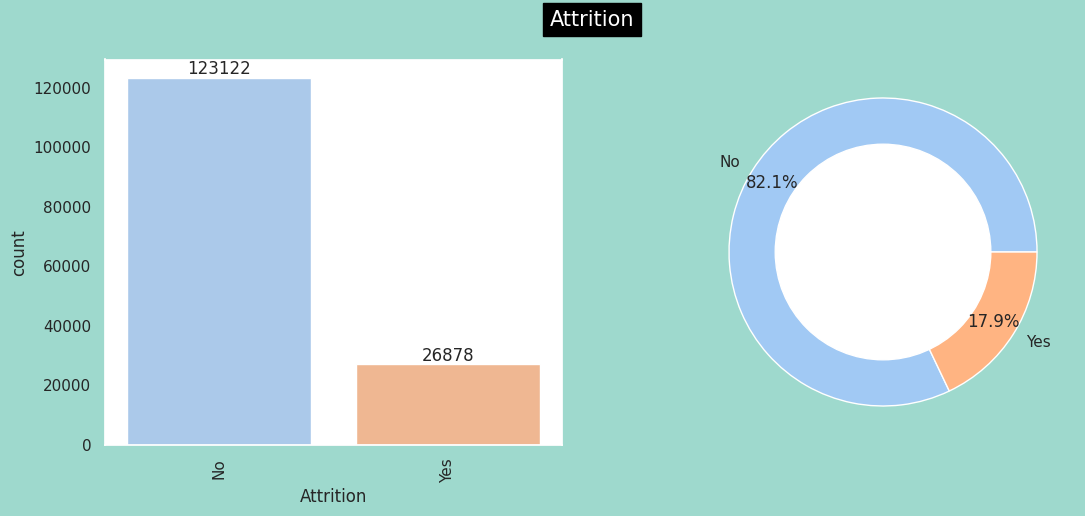

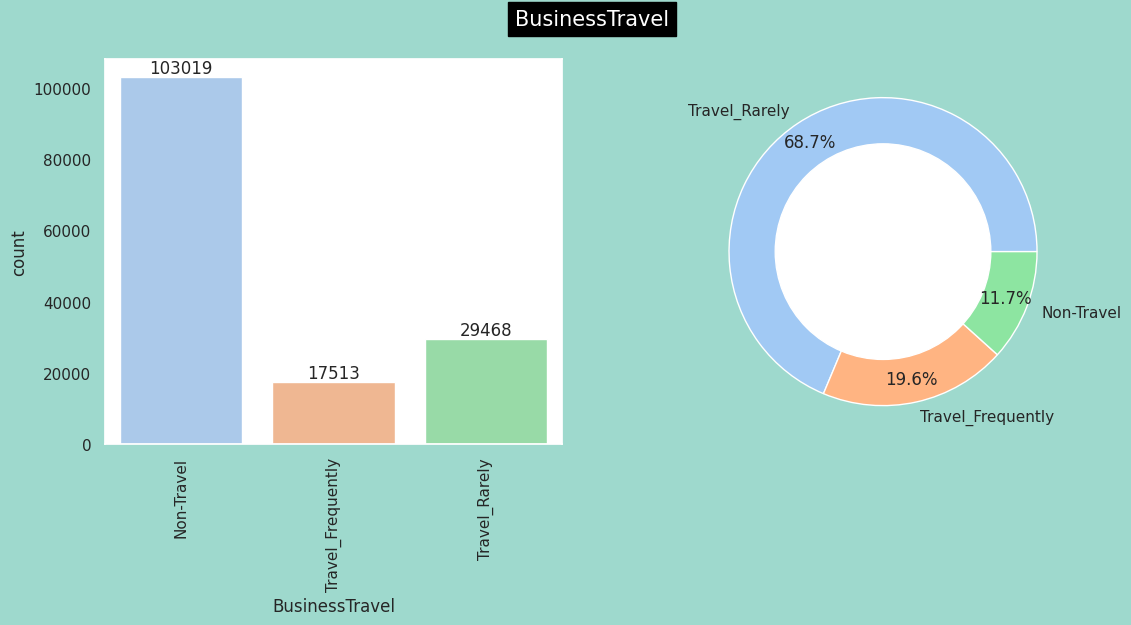

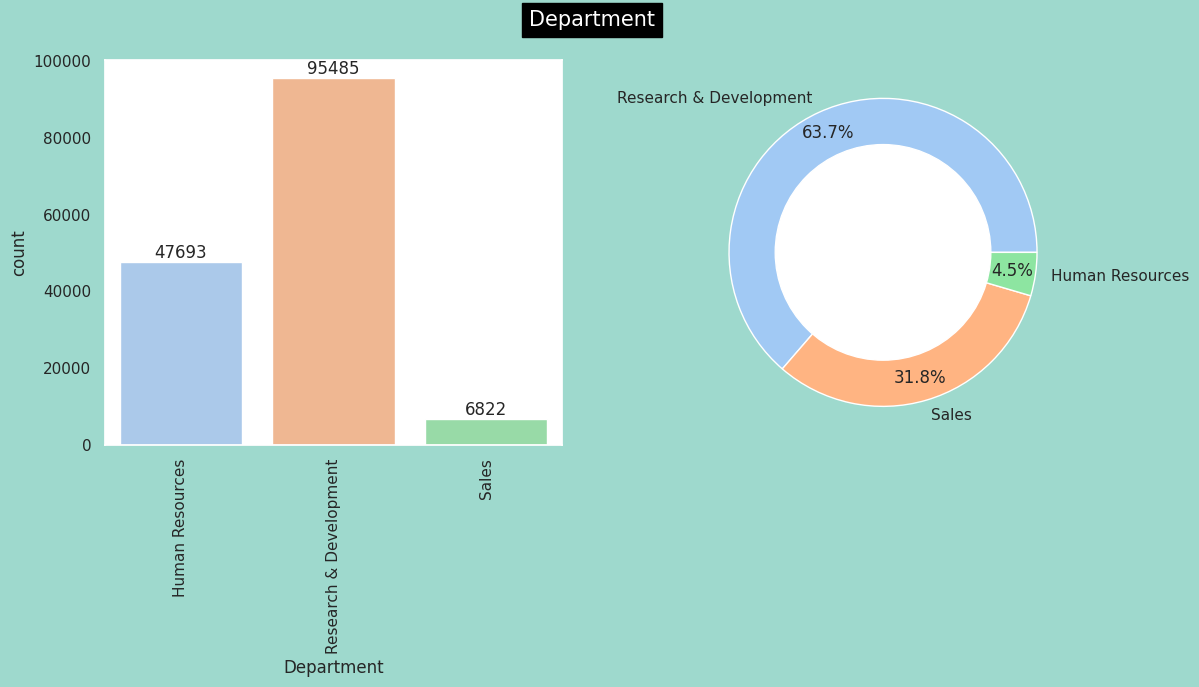

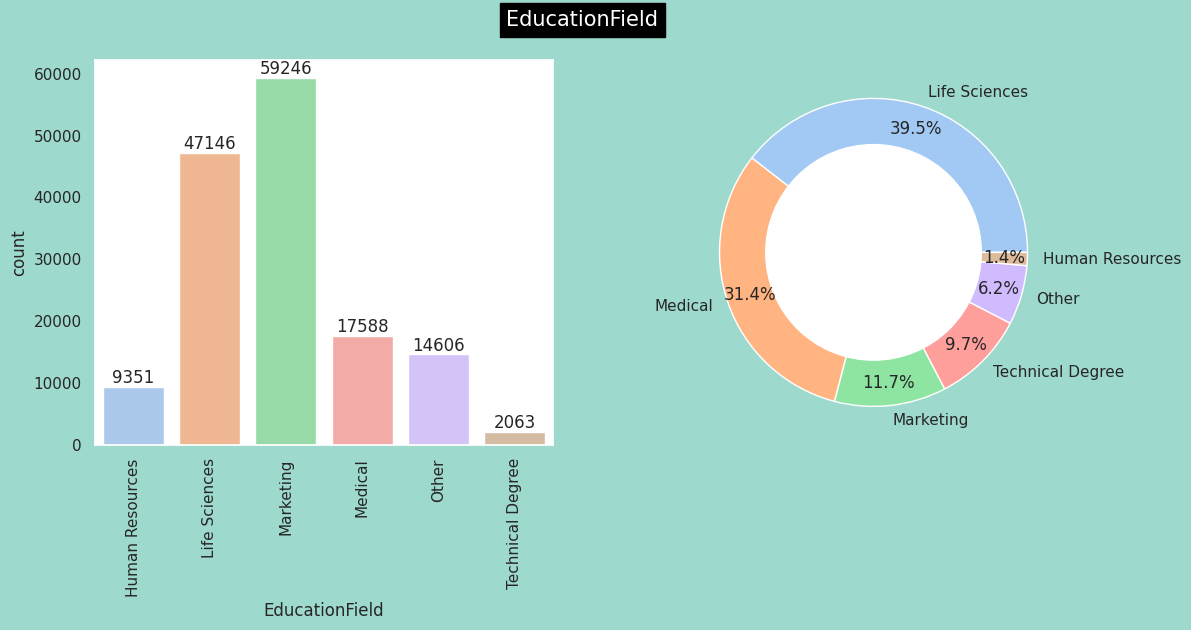

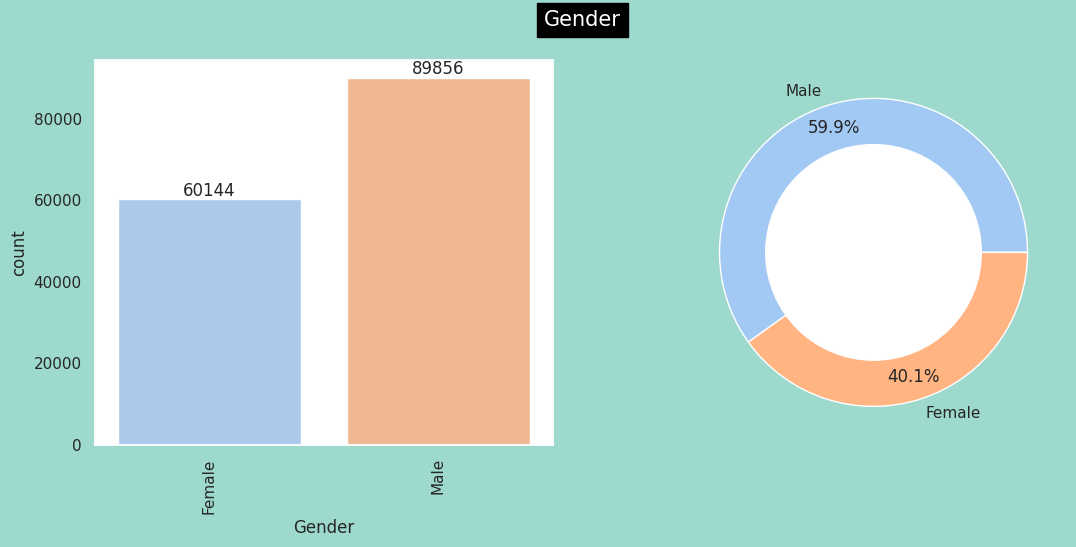

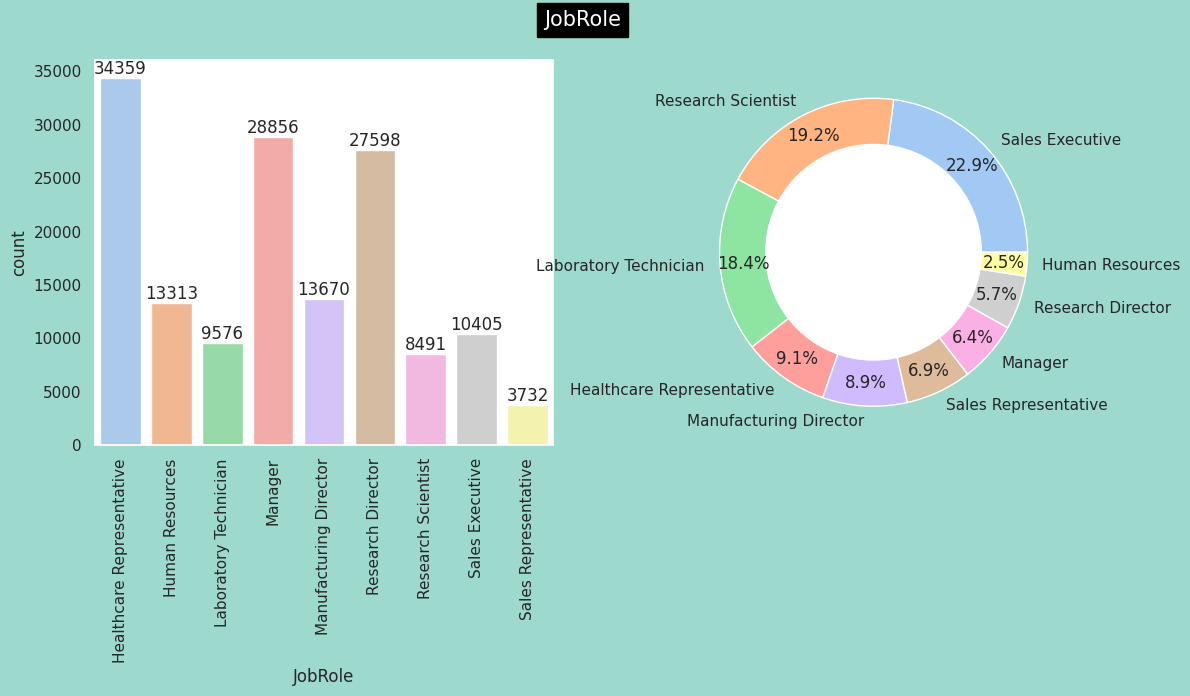

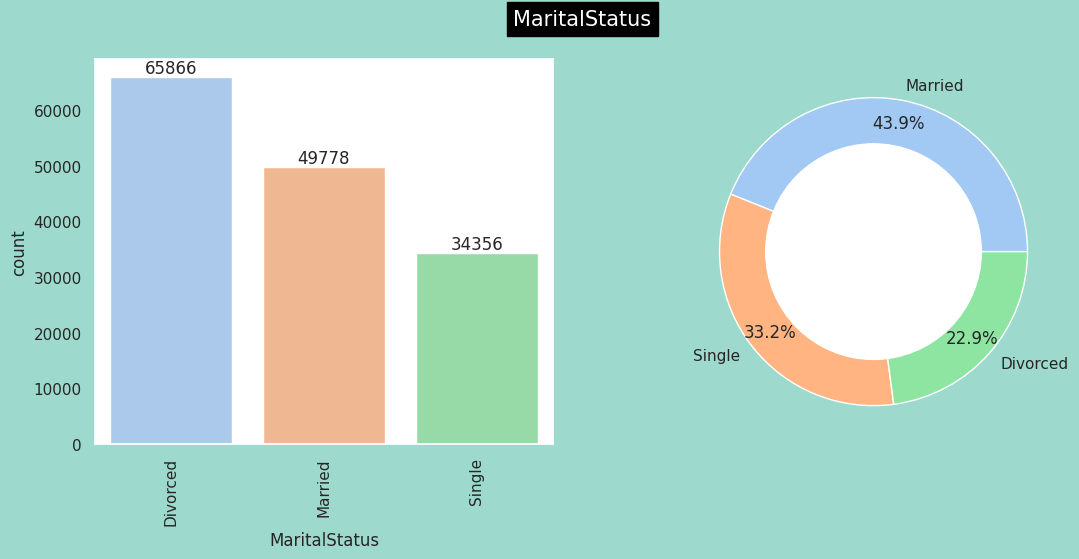

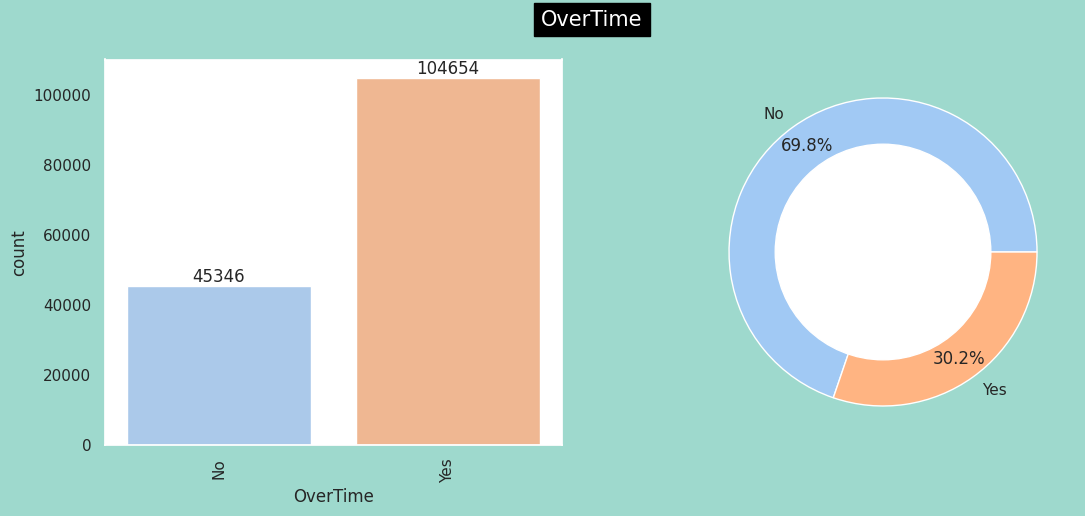

In [22]:
sns.set(rc={'axes.facecolor': 'White', 'figure.facecolor': '#9ed9cd'})
sns.set_palette('pastel')

for i, col in enumerate(categorical_columns):
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))

    ax = sns.countplot(data=emp_att_df, x=col, ax=axes[0])

    activities = [var for var in emp_att_df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities, rotation=90)

    for container in axes[0].containers:
        axes[0].bar_label(container)

    index = emp_att_df[col].value_counts().index
    size = emp_att_df[col].value_counts().values

    axes[1].pie(
        size,
        labels=index,
        autopct='%1.1f%%',
        pctdistance=0.85,
        colors=sns.color_palette('pastel'),
    )

    centre_circle = plt.Circle((0, 0), 0.70, fc='White')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.suptitle(col, backgroundcolor='Black', color='white', fontsize=15)

    plt.show()

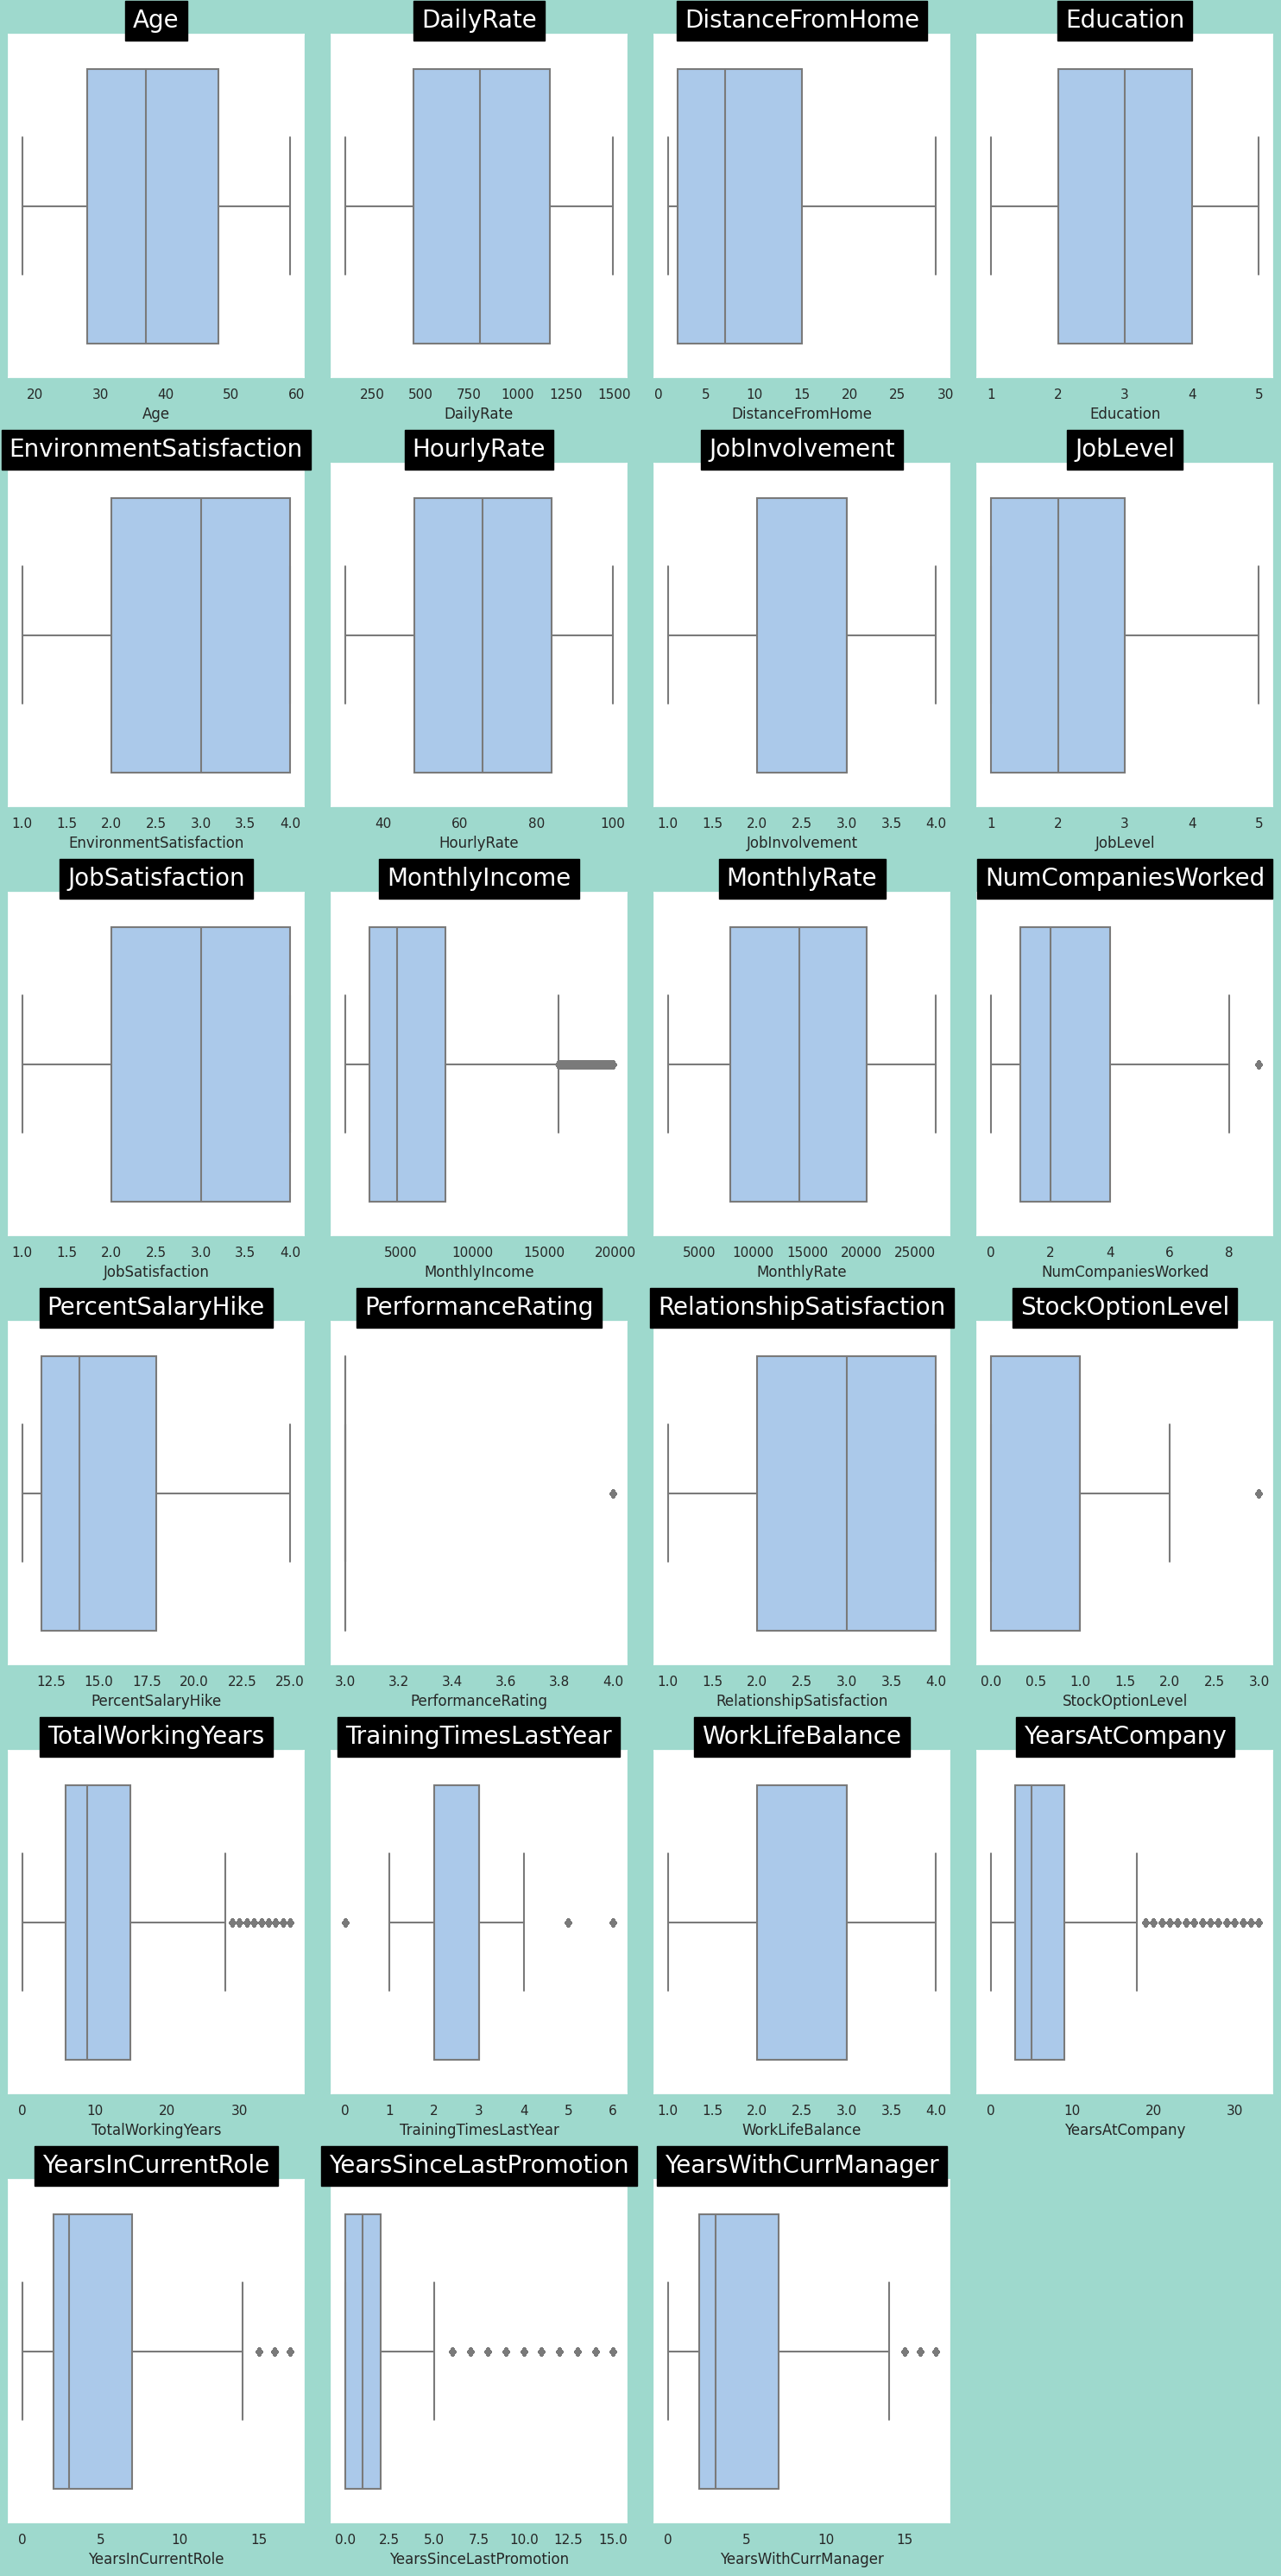

In [23]:
fig = plt.figure(figsize=(15, 30))

for idx, i in enumerate(numerical_columns):
    ax = fig.add_subplot(6, 4, idx + 1)

    sns.boxplot(x=i, data=emp_att_df, ax=ax)

    ax.set_title(i, backgroundcolor='black', color='white', fontsize=20)
    ax.set_xlabel(i, fontsize=12)
    ax.grid(True)

plt.tight_layout()

plt.show()

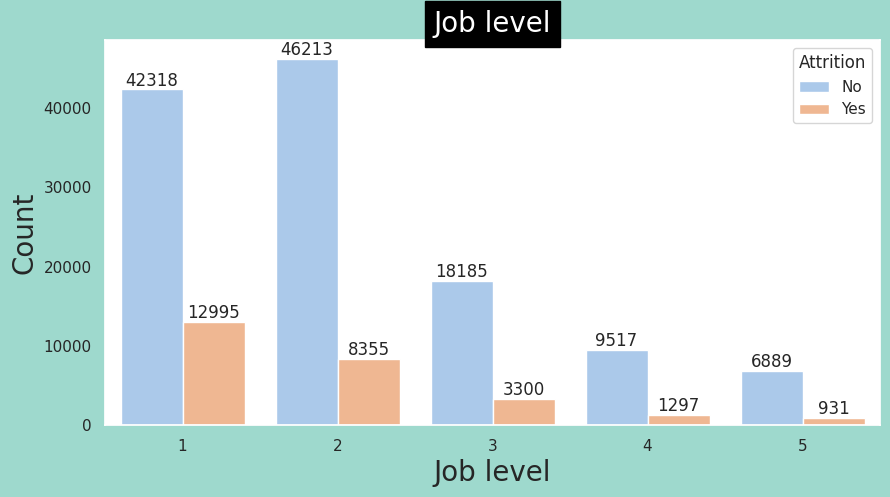

In [24]:
fig = plt.figure(figsize=(10, 5))

ax = sns.countplot(x="JobLevel", data=emp_att_df, hue="Attrition")

for container in ax.containers:
    ax.bar_label(container)

plt.title("Job level", backgroundcolor='black', color='white', fontsize=20)
plt.xlabel("Job level", fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid(True)

plt.show()

<Figure size 500x1000 with 0 Axes>

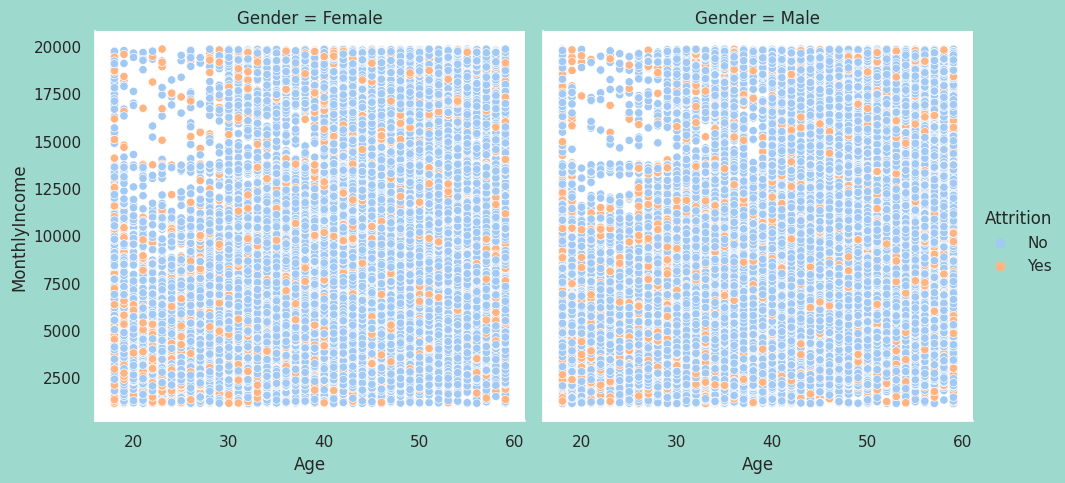

In [25]:
fig = plt.figure(figsize=(5, 10))

sns.relplot(
    data=emp_att_df,
    y="MonthlyIncome",
    x="Age",
    hue="Attrition",
    col="Gender",
    kind="scatter",
    col_wrap=2,
)

plt.show()

<Figure size 500x1000 with 0 Axes>

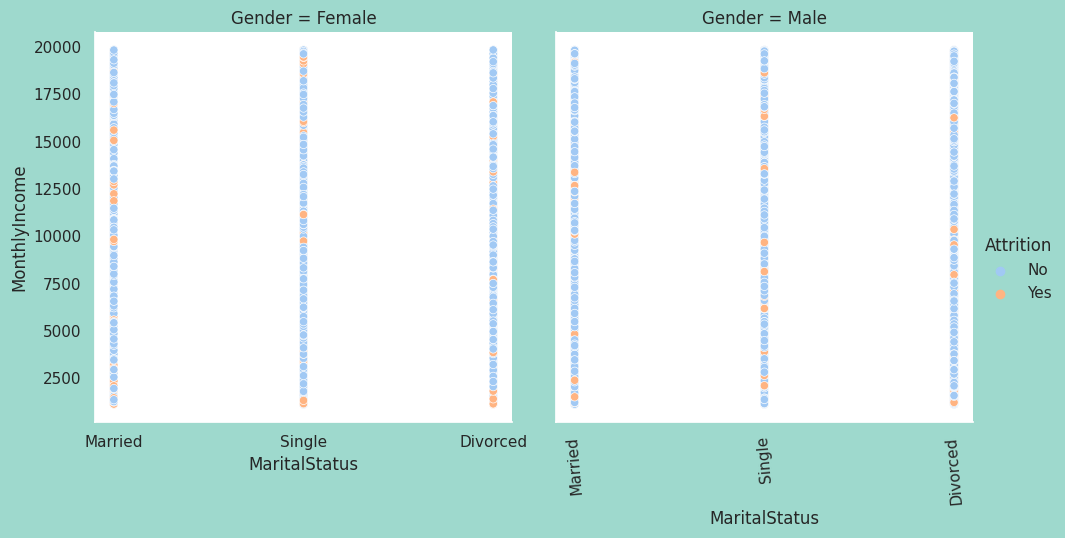

<Figure size 500x1000 with 0 Axes>

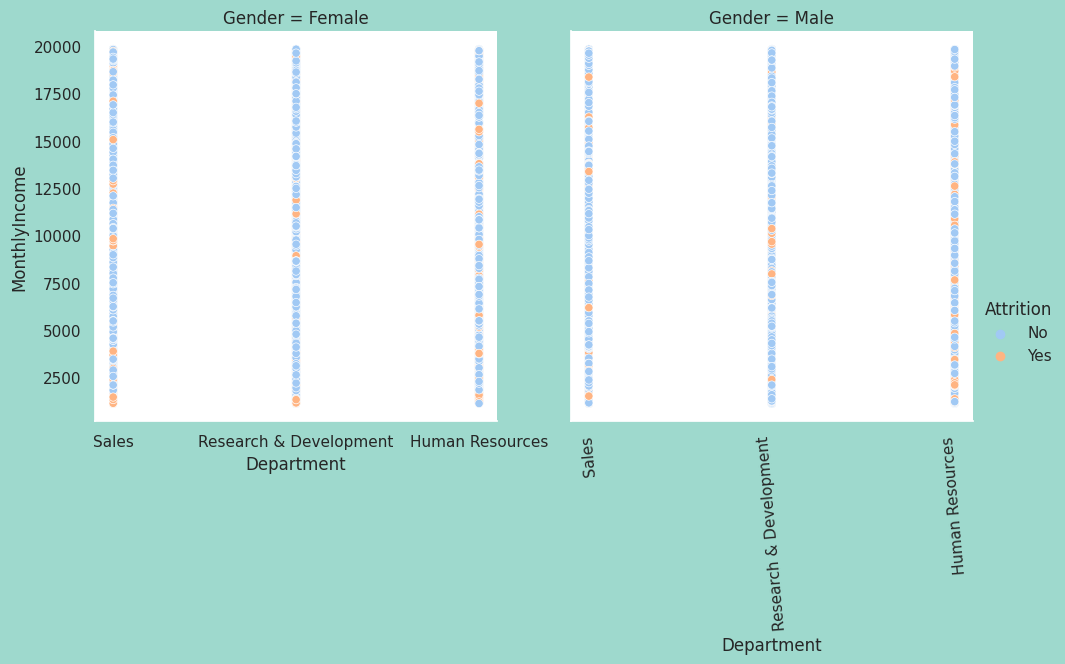

<Figure size 500x1000 with 0 Axes>

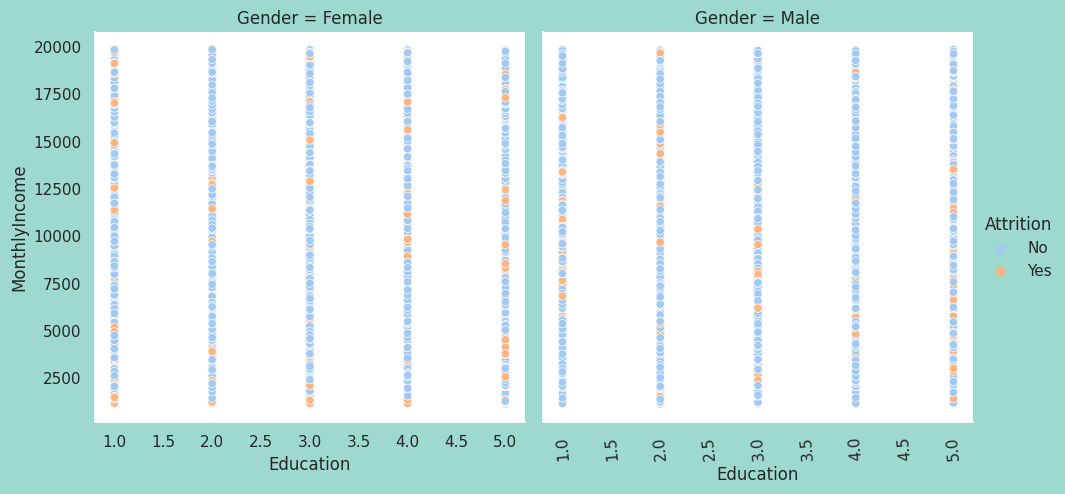

<Figure size 500x1000 with 0 Axes>

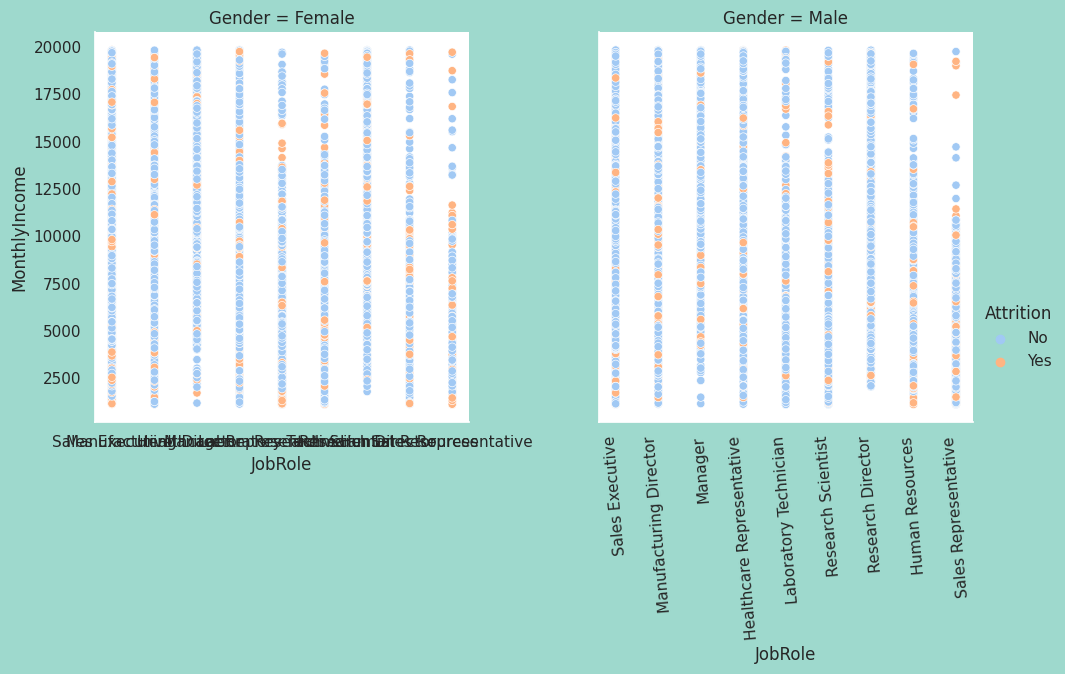

<Figure size 500x1000 with 0 Axes>

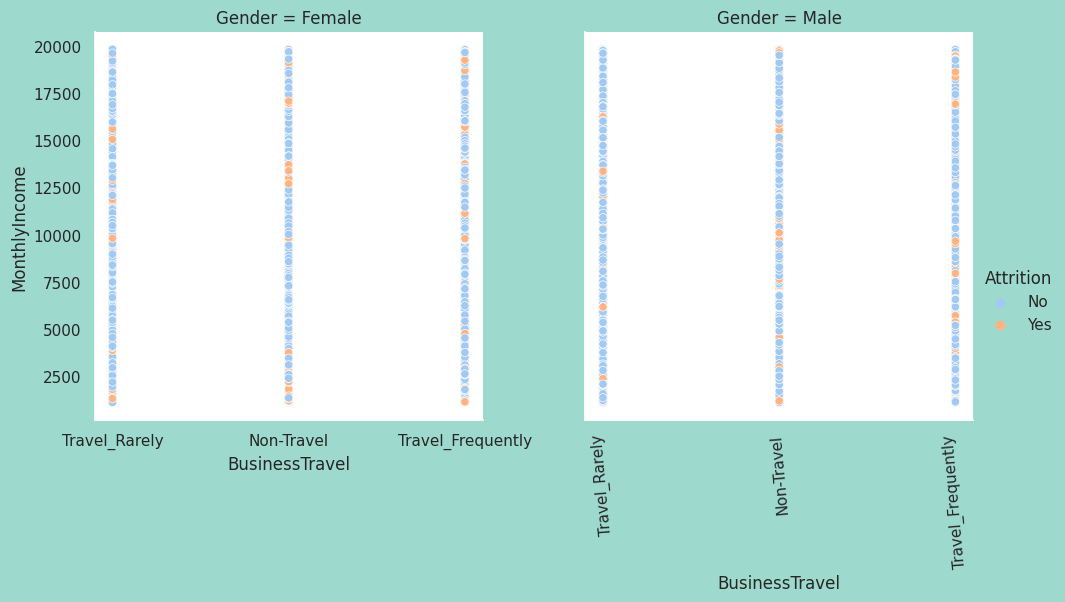

In [26]:
variables = ["MaritalStatus", "Department", "Education", "JobRole", "BusinessTravel"]

for variable in variables:
    fig = plt.figure(figsize=(5, 10))

    sns.relplot(
        data=emp_att_df,
        y="MonthlyIncome",
        x=variable,
        hue="Attrition",
        col="Gender",
        kind="scatter",
        col_wrap=2,
    )

    if variable == "JobRole":
        rotation = 90
        for i, ax in enumerate(fig.axes):
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

    plt.xticks(rotation=95)
    plt.yticks(rotation=95)

    plt.show()

In [27]:
emp_att_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,26,No,Travel_Rarely,265,Sales,3,2,Other,4,Female,...,3,1,1,11,2,3,11,17,4,2
1,31,No,Non-Travel,157,Research & Development,2,3,Medical,3,Female,...,3,3,0,12,4,3,13,0,0,8
2,48,No,Travel_Rarely,836,Research & Development,9,1,Life Sciences,4,Female,...,3,1,1,33,2,3,2,5,2,2
3,18,Yes,Non-Travel,664,Research & Development,17,3,Medical,2,Male,...,3,4,0,0,6,2,9,7,1,7
4,59,No,Travel_Rarely,230,Sales,7,3,Marketing,2,Male,...,3,2,0,3,2,2,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,23,No,Travel_Rarely,621,Sales,10,1,Technical Degree,4,Male,...,3,4,0,1,0,3,5,2,0,3
149996,59,No,Non-Travel,448,Research & Development,10,3,Life Sciences,4,Female,...,3,3,0,8,2,4,1,4,0,0
149997,18,No,Travel_Rarely,771,Research & Development,4,4,Life Sciences,4,Female,...,3,1,0,10,2,3,7,7,7,7
149998,29,No,Travel_Rarely,289,Sales,28,3,Life Sciences,4,Male,...,3,1,0,6,2,3,2,2,1,2


In [28]:
features = emp_att_df.drop('Attrition', axis=1)
features['BusinessTravel'] = features['BusinessTravel'].map({'Non-Travel':0,'Travel_Rarely': 1, 'Travel_Frequently':2})
features['Department'] = features['Department'].map({'Sales':0,'Research & Development': 1, 'Human Resources':2})
features['EducationField'] = features['EducationField'].map({'Life Sciences':0,'Other': 1, 'Medical':2, 'Marketing':3,'Technical Degree': 4, 'Human Resources':5})
features['Gender'] = features['Gender'].map({'Female':0,'Male': 1})
features['JobRole'] = features['JobRole'].map({'Laboratory Technician':0,'Research Scientist': 1, 'Manufacturing Director':2, 'Healthcare Representative':3, 'Manager': 4, 'Sales Representative':5, 'Research Director':6, 'Human Resources':7, 'Sales Executive': 8})
features['MaritalStatus'] = features['MaritalStatus'].map({'Single':0,'Married': 1, 'Divorced': 2})
features['OverTime'] = features['OverTime'].map({'No':0,'Yes': 1})


features

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,26,1,265,0,3,2,1,4,0,63,...,3,1,1,11,2,3,11,17,4,2
1,31,0,157,1,2,3,2,3,0,57,...,3,3,0,12,4,3,13,0,0,8
2,48,1,836,1,9,1,0,4,0,35,...,3,1,1,33,2,3,2,5,2,2
3,18,0,664,1,17,3,2,2,1,65,...,3,4,0,0,6,2,9,7,1,7
4,59,1,230,0,7,3,3,2,1,70,...,3,2,0,3,2,2,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,23,1,621,0,10,1,4,4,1,57,...,3,4,0,1,0,3,5,2,0,3
149996,59,0,448,1,10,3,0,4,0,64,...,3,3,0,8,2,4,1,4,0,0
149997,18,1,771,1,4,4,0,4,0,74,...,3,1,0,10,2,3,7,7,7,7
149998,29,1,289,0,28,3,0,4,1,35,...,3,1,0,6,2,3,2,2,1,2


In [29]:
features.isnull().values.any()


False

In [30]:
features.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X = features
y = emp_att_df['Attrition'].map({'No':0, 'Yes':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

clf = RandomForestClassifier(n_estimators = 100)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics
print()

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8214666666666667


In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8008666666666666


In [33]:
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.metrics import accuracy_score


X = features
y = emp_att_df['Attrition'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("ACCURACY OF THE MODEL: ", accuracy)

ACCURACY OF THE MODEL:  0.8187777777777778


In [34]:
from imblearn.under_sampling import RandomUnderSampler


X = features
y = emp_att_df['Attrition'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("ACCURACY OF THE MODEL: ", accuracy)

ACCURACY OF THE MODEL:  0.6464666666666666


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))